In [2]:
#importing all the necessary libraries 

import pandas as pd
import requests 
from bs4 import BeautifulSoup
import numpy as np

In [3]:
#importing selenium for automation

from selenium import webdriver
driver = webdriver.Chrome('/Users/manjul/chromedriver')#(ChromeDriverManager().install())
url = 'https://www.imdb.com/title/tt10919420/reviews?spoiler=hide&sort=reviewVolume&dir=desc&ratingFilter=0'
driver.get(url)

#driver.implicily_wait(10)

In [4]:
#creating empty lists to store the data
list_of_review_title = []
list_of_ratings = []  
list_of_dates = []

In [5]:
#code for extracting reviews from every page. 

page = 1
while page < 50 :

        review_list= driver.find_elements_by_class_name('lister-item-content')
        
        #iterating each element to get the ratings & reviews
        for elements in review_list :

            #finding the reviews
            user_review_title = elements.find_element_by_tag_name('a').text
            #finding the raatings
            user_rating = elements.find_element_by_tag_name('span').text
            #finding the review date
            user_review_date = elements.find_element_by_class_name('review-date').text


            #appending the review to the list
            list_of_review_title.append(user_review_title)
            #appending the rating to the list
            list_of_ratings.append(user_rating)
            #appending the dates to the list
            list_of_dates.append(user_review_date)

            try :
                #Since IMBD only displays 25 reviews, we need to click on 'load more' to get more data
                driver.find_element_by_class_name('ipl-load-more__button').click()
                page+=1

            except :
                continue

In [6]:
#creating a dataframe for analysis
df = pd.DataFrame(list(zip(list_of_review_title,list_of_ratings,list_of_dates)),
               columns =['Reviews', 'Ratings','Date'])

In [7]:
df

,Reviews,Ratings,Date
0,Just a game,9/10,10 October 2021
1,"trust me, you have never seen anything like this",10/10,1 November 2021
2,Violent funny atypical K drama,8/10,6 November 2021
3,"if you think this is good, PLEASE watch the ko...",5/10,9 October 2021
4,8,8/10,4 October 2021
...,...,...,...
1595,Almost perfect,9/10,4 October 2021
1596,Uncut gems meets parasite meets eyes wide shut...,9/10,22 September 2021
1597,Be wise. Don't even consider this trash.,1/10,18 October 2021
1598,literally almost perfect,9/10,1 October 2021


In [ ]:
#downloading the dataset 
#df.to_excel("~/Desktop/Squid_games_dataset.xlsx")

# Data cleaning & preparation 

In [8]:
# get the unique values (rows)
newdf = df.drop_duplicates()

In [13]:
#downloading the dataset 
newdf.to_excel("~/Desktop/Squid_games_dataset_latest.xlsx")

In [9]:
newdf

,Reviews,Ratings,Date
0,Just a game,9/10,10 October 2021
1,"trust me, you have never seen anything like this",10/10,1 November 2021
2,Violent funny atypical K drama,8/10,6 November 2021
3,"if you think this is good, PLEASE watch the ko...",5/10,9 October 2021
4,8,8/10,4 October 2021
...,...,...,...
1595,Almost perfect,9/10,4 October 2021
1596,Uncut gems meets parasite meets eyes wide shut...,9/10,22 September 2021
1597,Be wise. Don't even consider this trash.,1/10,18 October 2021
1598,literally almost perfect,9/10,1 October 2021


In [10]:
print(df.head(10))
print(newdf.head(10))

                                             Reviews          Ratings  \
0                                        Just a game             9/10   
1   trust me, you have never seen anything like this            10/10   
2                     Violent funny atypical K drama             8/10   
3  if you think this is good, PLEASE watch the ko...             5/10   
4                                                  8             8/10   
5                                Overrated, But Good             8/10   
6                  Good concept and solid excecution             8/10   
7            10th time. All Father give me strength.             1/10   
8                                        Good enough             7/10   
9        🦑🎮 Not close to perfect, but still amazing.  Top_Dawg_Critic   

               Date  
0   10 October 2021  
1   1 November 2021  
2   6 November 2021  
3    9 October 2021  
4    4 October 2021  
5  11 November 2021  
6   5 November 2021  
7   30 October 2021 

In [11]:
dataTypeSeries = newdf.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
Reviews    object
Ratings    object
Date       object
dtype: object


In [203]:
#remove rows which have non numeric datatype. Got the indexes from Excel.
newdf = newdf.drop([9,240,258,272,297,382,810,819,921,1046,1052,1070,1283,1327])


#remove /10 from ratings column & convert ratings datatype into numeric. 
newdf["Ratings"] = newdf["Ratings"].str.replace('/10', '').astype(int) 


In [47]:
#checking the datatype after conversion
dataTypeSeries = newdf.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
Reviews    object
Ratings     int64
Date       object
dtype: object


In [ ]:
# Questions to ask : 

# What's the distribution of ratings?

# What are the lower, middle, and upper quartiles?

# What are the 1st and 9th deciles?

# What are the common words associated with the highly negative reviews and the highly positive reviews?

# Data visualisation 

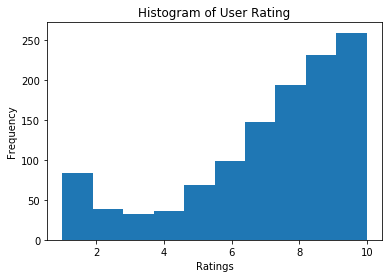

In [49]:
#Using matplot library

import matplotlib.pyplot as plt 

plt.hist(newdf['Ratings'])

plt.xlabel('Ratings')

plt.ylabel('Frequency')

plt.title('Histogram of User Rating')

plt.show()


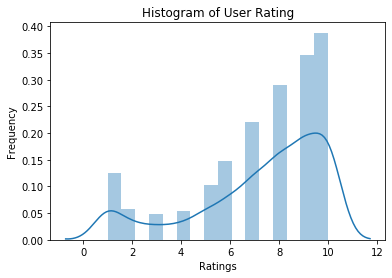

In [52]:
#Using seaborn library

import seaborn as sns

sns.distplot(newdf['Ratings'])

plt.title('Histogram of User Rating')

plt.ylabel('Frequency')

plt.xlabel('Ratings')

plt.show()

In [51]:
#descriptive stats about the data 
newdf.describe()

,Ratings
count,1186.000000
mean,7.231872
std,2.682847
min,1.000000
25%,6.000000
50%,8.000000
75%,9.000000
max,10.000000


In [179]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 0 to 1599
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  1186 non-null   object
 1   Ratings  1186 non-null   int64 
 2   Date     1186 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.1+ KB


# Sentiment Analysis

In [211]:
from textblob import TextBlob #library for sentiment analysis
import re #library for regex functions - cleaning 

x = "#1 show, hands down..."
gg = TextBlob(x)
gg.sentiment

Sentiment(polarity=-0.15555555555555559, subjectivity=0.2888888888888889)

In [218]:
#newdf["Reviews"] = newdf["Reviews"].str.lower() #lowering the case

#creating a function to clean the reviews

def clean_emoji (string) : 
    
    
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    #text = re.sub(r'[\.]+','',text) #removing all punctuation except exclamation marks
    #text = re.sub(r'!{2,}','!','',text) #replacing 2 or more exclamation marks with a single one

    
    
    return emoji_pattern.sub(r'', string) # no emoji

#cleaning the reviews
newdf['Reviews'] = newdf['Reviews'].apply(clean_emoji)

#showing the clean reviews
newdf

,Reviews,Ratings,Date
0,just a game,9,10 October 2021
1,"trust me, you have never seen anything like this",10,1 November 2021
2,violent funny atypical k drama,8,6 November 2021
3,"if you think this is good, please watch the ko...",5,9 October 2021
4,8,8,4 October 2021
...,...,...,...
1595,almost perfect,9,4 October 2021
1596,uncut gems meets parasite meets eyes wide shut...,9,22 September 2021
1597,be wise. don't even consider this trash.,1,18 October 2021
1598,literally almost perfect,9,1 October 2021


In [241]:
newdf['Reviews'] = newdf['Reviews'].str.replace(r"[^\w\s]","") #removing all punctuations

In [242]:
#cleaned reviews part II 
newdf

,Reviews,Ratings,Date
0,just a game,9,10 October 2021
1,trust me you have never seen anything like this,10,1 November 2021
2,violent funny atypical k drama,8,6 November 2021
3,if you think this is good please watch the kor...,5,9 October 2021
4,8,8,4 October 2021
...,...,...,...
1595,almost perfect,9,4 October 2021
1596,uncut gems meets parasite meets eyes wide shut...,9,22 September 2021
1597,be wise dont even consider this trash,1,18 October 2021
1598,literally almost perfect,9,1 October 2021


In [247]:
#Create a function to get the polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
  
#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
  
#Create two new columns ‘Subjectivity’ & ‘Polarity’
newdf['Subjectivity'] = newdf['Reviews'].apply(getSubjectivity)
newdf['Polarity'] = newdf['Reviews'].apply(getPolarity)

In [248]:
newdf

,Reviews,Ratings,Date,Subjectivity,Polarity
0,just a game,9,10 October 2021,0.400000,-0.400000
1,trust me you have never seen anything like this,10,1 November 2021,0.000000,0.000000
2,violent funny atypical k drama,8,6 November 2021,0.733333,-0.183333
3,if you think this is good please watch the kor...,5,9 October 2021,0.600000,0.700000
4,8,8,4 October 2021,0.000000,0.000000
...,...,...,...,...,...
1595,almost perfect,9,4 October 2021,1.000000,1.000000
1596,uncut gems meets parasite meets eyes wide shut...,9,22 September 2021,0.600000,-0.300000
1597,be wise dont even consider this trash,1,18 October 2021,0.900000,0.700000
1598,literally almost perfect,9,1 October 2021,1.000000,1.000000


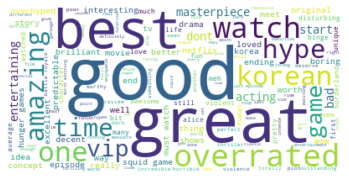

In [254]:
#making a word cloud 

from wordcloud import WordCloud, STOPWORDS

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['show','series'])

# Generate a word cloud image
text = " ".join(review for review in newdf['Reviews'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [257]:
#function to mark polarity as positive,negative or neutral

def getAnalysis(score) : 
    if score < 0 :
        return 'Negative'
    elif score == 0 :
        return 'Neutral'
    else :
        return 'Positive'
    
newdf['Analysis'] = newdf['Polarity'].apply(getAnalysis)

#show the result
newdf

,Reviews,Ratings,Date,Subjectivity,Polarity,Analysis
0,just a game,9,10 October 2021,0.400000,-0.400000,Negative
1,trust me you have never seen anything like this,10,1 November 2021,0.000000,0.000000,Neutral
2,violent funny atypical k drama,8,6 November 2021,0.733333,-0.183333,Negative
3,if you think this is good please watch the kor...,5,9 October 2021,0.600000,0.700000,Positive
4,8,8,4 October 2021,0.000000,0.000000,Neutral
...,...,...,...,...,...,...
1595,almost perfect,9,4 October 2021,1.000000,1.000000,Positive
1596,uncut gems meets parasite meets eyes wide shut...,9,22 September 2021,0.600000,-0.300000,Negative
1597,be wise dont even consider this trash,1,18 October 2021,0.900000,0.700000,Positive
1598,literally almost perfect,9,1 October 2021,1.000000,1.000000,Positive


Text(0, 0.5, 'Subjectivity')

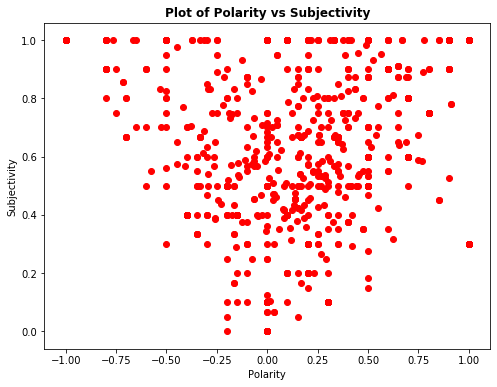

In [283]:
#plotting Polarity vs Subjectivity scatter plot

plt.figure(figsize=(8,6))
plt.scatter(newdf['Polarity'],newdf['Subjectivity'],color = 'red')
plt.title('Plot of Polarity vs Subjectivity', fontsize = 12, fontweight ='bold')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

## Checking the % of positive, negative & neutral reviews

In [312]:
#for positive
pos_reviews = newdf[newdf.Analysis == 'Positive']
pos_reviews = pos_reviews['Reviews']

print ("The % of positive reviews is : " + (str (round ((pos_reviews.shape[0]/newdf.shape[0]) * 100,2))))

The % of positive reviews is : 50.17


In [313]:
#for negative
neg_reviews = newdf[newdf.Analysis == 'Negative']
neg_reviews = neg_reviews['Reviews']

print ("The % of negative reviews is : " + (str (round ((neg_reviews.shape[0]/newdf.shape[0]) * 100,2))))

The % of negative reviews is : 19.22


In [314]:
#for neutral
neu_reviews = newdf[newdf.Analysis == 'Neutral']
neu_reviews = neu_reviews['Reviews']

print ("The % of neutral reviews is : " + (str (round ((neu_reviews.shape[0]/newdf.shape[0]) * 100,2))))

The % of neutral reviews is : 30.61


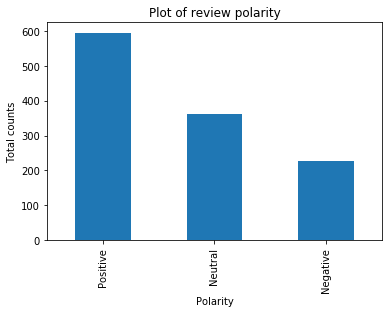

In [323]:
rev_counts = newdf['Analysis'].value_counts()

plt.title('Plot of review polarity')
plt.xlabel("Polarity")
plt.ylabel("Total counts")
rev_counts.plot(kind='bar')
plt.show()

## Conclusion
- The overall reviews were mostly inclined towards the upper end of the rating scale (8-10) as seen from the histogram
- The word cloud suggested that positive words (great,good,best) were largely associated with the user reviews
- Majority of the viewers (50%) loved the show but a considerable portion of viewers (30%) remained neutral as per the analysis